In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Letter\Letter_NL_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,NaN,NaN,4.0,3.0,2.0,7.0,8.0,NaN,NaN,11.0,7.0,7.0,NaN,8.0,5.0,6.0,NaN
1,4.0,7.0,5.0,5.0,NaN,5.0,9.0,6.0,4.0,8.0,7.0,9.0,2.0,9.0,NaN,10.0,NaN
2,NaN,10.0,8.0,7.0,4.0,8.0,8.0,5.0,NaN,NaN,2.0,8.0,2.0,5.0,5.0,10.0,NaN
3,4.0,9.0,5.0,7.0,4.0,7.0,7.0,13.0,1.0,7.0,6.0,8.0,3.0,8.0,0.0,8.0,NaN
4,6.0,NaN,8.0,5.0,4.0,7.0,6.0,3.0,7.0,10.0,7.0,9.0,3.0,8.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.0,10.0,5.0,NaN,NaN,4.0,10.0,7.0,NaN,NaN,10.0,9.0,2.0,9.0,2.0,NaN,NaN
19996,4.0,7.0,6.0,5.0,3.0,7.0,8.0,2.0,10.0,12.0,6.0,8.0,1.0,9.0,6.0,8.0,NaN
19997,4.0,8.0,NaN,6.0,4.0,7.0,8.0,7.0,4.0,NaN,7.0,NaN,3.0,NaN,3.0,7.0,NaN
19998,4.0,NaN,4.0,8.0,3.0,0.0,2.0,NaN,6.0,1.0,0.0,NaN,NaN,8.0,0.0,8.0,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	4000
float64		column 2	4000
float64		column 3	3500
float64		column 4	3000
float64		column 5	4000
float64		column 6	4000
float64		column 7	3000
float64		column 8	3500
float64		column 9	3500
float64		column 10	5500
float64		column 11	3000
float64		column 12	4500
float64		column 13	5000
float64		column 14	3500
float64		column 15	4000
float64		column 16	6000
float64		column 17	20000


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
count,16000.000000,16000.000000,16500.000000,17000.000000,16000.000000,16000.000000,17000.000000,16500.000000,16500.000000,14500.000000,17000.000000,15500.000000,15000.000000,16500.000000,16000.000000,14000.000000,0.0
mean,4.004875,7.094563,5.108061,5.388235,3.472375,6.906438,7.481824,4.576667,5.184848,8.196207,6.433824,7.933484,2.986067,8.319333,3.652938,7.827429,NaN
std,1.790161,3.103159,1.898739,2.163254,2.048902,1.881796,2.210101,2.542684,2.245632,2.260179,2.503290,1.895564,2.122492,1.457739,2.394127,1.395068,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,7.000000,3.000000,4.000000,7.000000,5.000000,7.000000,2.000000,8.000000,2.000000,7.000000,NaN
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,4.000000,8.000000,NaN
75%,5.000000,9.000000,6.000000,7.000000,4.000000,8.000000,8.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,8.000000,NaN
max,15.000000,15.000000,14.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,14.000000,15.000000,NaN


<AxesSubplot:>

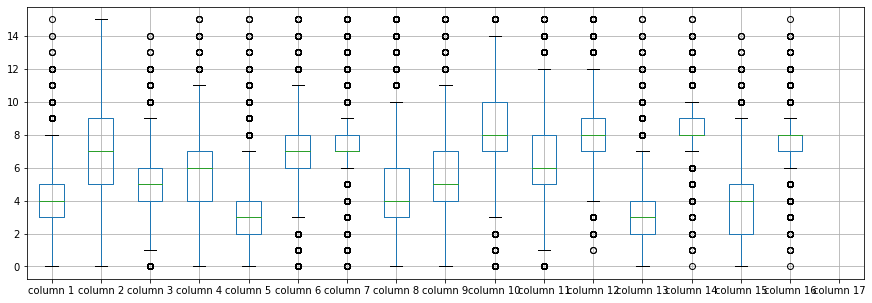

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     4.004875
column 2     7.094563
column 3     5.108061
column 4     5.388235
column 5     3.472375
column 6     6.906438
column 7     7.481824
column 8     4.576667
column 9     5.184848
column 10    8.196207
column 11    6.433824
column 12    7.933484
column 13    2.986067
column 14    8.319333
column 15    3.652938
column 16    7.827429
column 17         NaN
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
column 1,1.000000,0.711274,0.829158,0.636338,0.585386,-0.017868,0.044200,0.011201,0.035822,0.150178,0.036114,-0.028459,0.456143,0.085265,0.240572,-0.101670,NaN
column 2,0.711274,1.000000,0.623379,0.792947,0.485510,0.048486,-0.041615,-0.017316,0.084642,0.135690,-0.050615,0.005189,0.250550,-0.007379,0.201501,-0.034045,NaN
column 3,0.829158,0.623379,1.000000,0.630401,0.738071,0.063191,0.018071,-0.091422,0.037676,0.113016,0.021868,-0.029987,0.505690,0.038431,0.232848,-0.103675,NaN
column 4,0.636338,0.792947,0.630401,1.000000,0.606504,0.036245,-0.018889,0.074926,0.049749,0.003989,-0.004191,0.029192,0.247683,0.017863,0.264643,-0.023030,NaN
column 5,0.585386,0.485510,0.738071,0.606504,1.000000,0.130116,-0.030267,-0.019980,-0.057647,-0.048355,-0.058473,-0.033205,0.579253,0.021243,0.441641,-0.062334,NaN
column 6,-0.017868,0.048486,0.063191,0.036245,0.130116,1.000000,-0.344404,-0.050813,-0.115476,0.054769,-0.307573,-0.043813,0.127960,-0.212084,0.123035,0.212713,NaN
column 7,0.044200,-0.041615,0.018071,-0.018889,-0.030267,-0.344404,1.000000,-0.112263,-0.036796,0.155799,0.564365,-0.230254,-0.033091,0.510621,-0.082145,-0.177576,NaN
column 8,0.011201,-0.017316,-0.091422,0.074926,-0.019980,-0.050813,-0.112263,1.000000,-0.162651,-0.290669,0.033416,0.082586,0.123252,-0.069700,0.029424,0.144776,NaN
column 9,0.035822,0.084642,0.037676,0.049749,-0.057647,-0.115476,-0.036796,-0.162651,1.000000,0.110757,-0.050187,0.096994,-0.335556,-0.046778,0.221935,-0.053778,NaN
column 10,0.150178,0.135690,0.113016,0.003989,-0.048355,0.054769,0.155799,-0.290669,0.110757,1.000000,0.051005,-0.096880,-0.146008,0.038200,-0.082419,-0.089356,NaN


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+8,17+8+8,17+8+8+8,17+8+8,17+8,17], vae_layer = False, seed = 80)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [17]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 59.37794370727539
Epoch: 1 , loss: 39.65122805328369
Epoch: 2 , loss: 36.39719959564209
Epoch: 3 , loss: 35.03898880157471
Epoch: 4 , loss: 34.28502904052734
Epoch: 5 , loss: 33.767972897338865
Epoch: 6 , loss: 33.327064083862304
Epoch: 7 , loss: 33.102972894287106
Epoch: 8 , loss: 32.70035310516357
Epoch: 9 , loss: 32.59821453857422
Epoch: 10 , loss: 32.362309924316406
Epoch: 11 , loss: 32.460602476501464
Epoch: 12 , loss: 32.11246246185303
Epoch: 13 , loss: 32.249776139831546
Epoch: 14 , loss: 31.9523986618042
Epoch: 15 , loss: 31.96942702331543
Epoch: 16 , loss: 31.88803373260498
Epoch: 17 , loss: 31.80236648864746
Epoch: 18 , loss: 31.82315293426514
Epoch: 19 , loss: 31.777155436706543
Epoch: 20 , loss: 31.65192548980713
Epoch: 21 , loss: 31.617214709472655
Epoch: 22 , loss: 31.630286219787596
Epoch: 23 , loss: 31.54017552642822
Epoch: 24 , loss: 31.700451345825197
Epoch: 25 , loss: 31.569268791198

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(20000, 17)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     3.000000
column 2     7.000000
column 3     3.000000
column 4     3.847786
column 5     1.000000
column 6     4.845973
column 7     1.000000
column 8     5.000000
column 9     5.000000
column 10    5.639269
column 11    1.000000
column 12    5.457706
column 13    0.000000
column 14    8.000000
column 15    2.562704
column 16    8.000000
column 17    0.004108
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Letter.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.071494,3.272149,0.000000,0.000000,0.000000,0.0,0.0,2.624683,-3.643378,0.000000,0.0,0.000000,2.000812,0.000000,0.000000,0.000000,NaN
1,0.000000,0.000000,0.000000,0.000000,-0.951369,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-2.778158,0.000000,NaN
2,-4.509231,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,-6.699288,-5.929509,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
4,0.000000,2.828941,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,3.820404,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.000000,0.000000,0.000000,-2.681501,0.410264,0.0,0.0,0.000000,-2.985481,-4.052723,0.0,0.000000,0.000000,0.000000,0.000000,1.670432,NaN
19996,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
19997,0.000000,0.000000,2.984415,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.132380,0.0,4.719048,0.000000,2.287395,0.000000,0.000000,NaN
19998,0.000000,-4.277042,0.000000,0.000000,0.000000,0.0,0.0,0.474131,0.000000,0.000000,0.0,0.885741,2.793990,0.000000,0.000000,0.000000,NaN


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

789.175622319911

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

3733.8164121981144

In [18]:
NRMS=numerator/denominator
NRMS


0.21135897837444015

In [19]:
new_df.iloc[66,:]

column 1      6.000000
column 2      9.000000
column 3     10.000000
column 4      7.000000
column 5     11.000000
column 6      8.193507
column 7      5.000000
column 8      3.000000
column 9      2.000000
column 10     9.000000
column 11     7.548017
column 12     8.000000
column 13    11.000000
column 14     6.000000
column 15     4.000000
column 16     7.000000
column 17     0.001830
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,4.071494,7.272149,4.000000,3.000000,2.000000,7.0,8.0,4.624683,5.356622,11.000000,7.0,7.000000,3.000812,8.000000,5.000000,6.000000,0.001446
1,4.000000,7.000000,5.000000,5.000000,4.048631,5.0,9.0,6.000000,4.000000,8.000000,7.0,9.000000,2.000000,9.000000,4.221842,10.000000,-0.002590
2,2.490769,10.000000,8.000000,7.000000,4.000000,8.0,8.0,5.000000,3.300712,5.070491,2.0,8.000000,2.000000,5.000000,5.000000,10.000000,-0.000633
3,4.000000,9.000000,5.000000,7.000000,4.000000,7.0,7.0,13.000000,1.000000,7.000000,6.0,8.000000,3.000000,8.000000,0.000000,8.000000,0.001312
4,6.000000,9.828941,8.000000,5.000000,4.000000,7.0,6.0,3.000000,7.000000,10.000000,7.0,9.000000,3.000000,8.000000,3.000000,10.820404,-0.000672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.000000,10.000000,5.000000,5.318499,3.410264,4.0,10.0,7.000000,5.014519,7.947277,10.0,9.000000,2.000000,9.000000,2.000000,7.670432,-0.002120
19996,4.000000,7.000000,6.000000,5.000000,3.000000,7.0,8.0,2.000000,10.000000,12.000000,6.0,8.000000,1.000000,9.000000,6.000000,8.000000,0.004072
19997,4.000000,8.000000,6.984415,6.000000,4.000000,7.0,8.0,7.000000,4.000000,11.132380,7.0,10.719048,3.000000,11.287395,3.000000,7.000000,0.003174
19998,4.000000,6.722958,4.000000,8.000000,3.000000,0.0,2.0,4.474131,6.000000,1.000000,0.0,7.885741,2.793990,8.000000,0.000000,8.000000,0.001332


In [21]:
imputations[-1].to_excel("Letter_NL_20(imp).xlsx", index=False, header=False)